## implementation of support vector machine (SVM)

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_classification

X,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,n_classes=2,n_redundant=0)

In [4]:
pd.DataFrame(X).head()

,0,1
0,0.814431,1.194573
1,-1.976508,-2.015892
2,1.048508,1.081989
3,-0.884166,-0.888404
4,0.280150,1.117777


In [5]:
X.shape

(1000, 2)

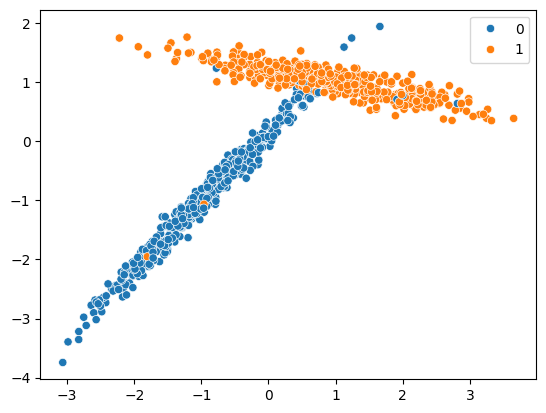

In [8]:
import seaborn as sns
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [11]:
y_pred=model.predict(X_test)

In [12]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1])

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

[[101   6]
 [  0  93]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       107
           1       0.94      1.00      0.97        93

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Accuracy: 0.97


In [14]:
## use noisy data from classification
X_sample,y_sample=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=2,n_classes=2,n_redundant=0,flip_y=0.1)

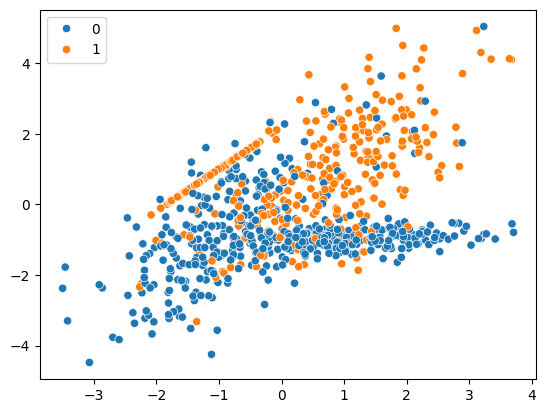

In [16]:
sns.scatterplot(x=X_sample[:,0],y=X_sample[:,1],hue=y_sample)
plt.show()

In [17]:
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X_sample,y_sample,test_size=0.2,random_state=42)
model_1=SVC()
model_1.fit(X_train_s,y_train_s)
y_pred_s=model_1.predict(X_test_s)

In [18]:
# accuarcy calculation

print(confusion_matrix(y_test_s,y_pred_s))
print(classification_report(y_test_s,y_pred_s))
print("Accuracy:",accuracy_score(y_test_s,y_pred_s))

[[78 15]
 [13 94]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        93
           1       0.86      0.88      0.87       107

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

Accuracy: 0.86


### Use kernel imporove accuracy of model

In [19]:
#use linear kernel
model_2=SVC(kernel='linear')
model_2.fit(X_train_s,y_train_s)
y_pred_2=model_2.predict(X_test_s)

In [20]:
print(confusion_matrix(y_test_s,y_pred_2))
print(classification_report(y_test_s,y_pred_2))
print("Accuracy:",accuracy_score(y_test_s,y_pred_2))

[[77 16]
 [14 93]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        93
           1       0.85      0.87      0.86       107

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

Accuracy: 0.85


In [21]:
# use rbf kernel
model_3=SVC(kernel='rbf')
model_3.fit(X_train_s,y_train_s)
y_pred_3=model_3.predict(X_test_s)

In [22]:
print(confusion_matrix(y_test_s,y_pred_3))
print(classification_report(y_test_s,y_pred_3))
print("Accuracy:",accuracy_score(y_test_s,y_pred_3))

[[78 15]
 [13 94]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        93
           1       0.86      0.88      0.87       107

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

Accuracy: 0.86


In [23]:
# use polynomial kernel
model_4=SVC(kernel='poly',degree=3)
model_4.fit(X_train_s,y_train_s)
y_pred_4=model_4.predict(X_test_s)

In [24]:
print(confusion_matrix(y_test_s,y_pred_4))
print(classification_report(y_test_s,y_pred_4))
print("Accuracy:",accuracy_score(y_test_s,y_pred_4))

[[84  9]
 [23 84]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        93
           1       0.90      0.79      0.84       107

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200

Accuracy: 0.84


In [25]:
# use sigmoid kernel
model_5=SVC(kernel='sigmoid')
model_5.fit(X_train_s,y_train_s)
y_pred_5=model_5.predict(X_test_s)

In [26]:
print(confusion_matrix(y_test_s,y_pred_5))
print(classification_report(y_test_s,y_pred_5))
print("Accuracy:",accuracy_score(y_test_s,y_pred_5))

[[60 33]
 [36 71]]
              precision    recall  f1-score   support

           0       0.62      0.65      0.63        93
           1       0.68      0.66      0.67       107

    accuracy                           0.66       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.66      0.66      0.66       200

Accuracy: 0.655


In [27]:
### gridsearch cv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly','sigmoid','linear']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=5,n_jobs=-1)
grid.fit(X_train_s,y_train_s)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'poly', ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [28]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [30]:
y_pred_grid=grid.predict(X_test_s)  
print(confusion_matrix(y_test_s,y_pred_grid))
print(classification_report(y_test_s,y_pred_grid))
print("Accuracy:",accuracy_score(y_test_s,y_pred_grid))

[[81 12]
 [ 9 98]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        93
           1       0.89      0.92      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200

Accuracy: 0.895
